# Analysis 4

## Using NYC vehicle collision and weather dataset to find out top 5 rainfall and snowfall in inches between 2015-2017(current date) that caused most injuries to people

In [5]:
import matplotlib.pyplot as plt #importing the required libraries
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd

### Reading the collision dataset

In [6]:
from pandas import Series, DataFrame
rawdata = pd.read_csv('ProcessedData\\NYPD_Motor_Vehicle_Collisions.csv') #reading the raw data from vehicle collision dataset
rawdata[:4]

C:\Users\mites\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/04/2017,0:00,BROOKLYN,11206,40.700830,-73.933140,"(40.70083, -73.93314)",EVERGREEN AVENUE,NOLL STREET,NaN,...,NaN,NaN,NaN,NaN,3646753,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/04/2017,0:00,BROOKLYN,11221,40.698307,-73.923256,"(40.698307, -73.923256)",NaN,NaN,1353 MYRTLE AVENUE,...,Unspecified,NaN,NaN,NaN,3646754,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
2,04/04/2017,0:00,BROOKLYN,11225,40.663334,-73.960236,"(40.663334, -73.960236)",NaN,NaN,57 EMPIRE BOULEVARD,...,Unspecified,NaN,NaN,NaN,3645240,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,04/04/2017,0:00,MANHATTAN,10002,40.714440,-73.990390,"(40.71444, -73.99039)",NaN,NaN,28 CANAL STREET,...,Unspecified,NaN,NaN,NaN,3645679,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


### Reading the weather dataset

In [7]:
from pandas import Series, DataFrame
rawdataweather = pd.read_csv('ProcessedData\\weather.csv') #reading the raw data from waether dataset 

In [8]:
rawdataweather['DATE'] = pd.to_datetime(rawdataweather['DATE']) #converting the date column into datetime format
rawdataweather[:4]

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,MDPR,MDSF,DAPR,DASF,...,PGTM,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
0,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,71.0,41.0639,-73.7722,2015-01-01,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,71.0,41.0639,-73.7722,2015-01-02,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,71.0,41.0639,-73.7722,2015-01-03,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GHCND:US1NYWC0003,WHITE PLAINS 3.1 NNW NY US,71.0,41.0639,-73.7722,2015-01-06,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
rawdata['DATE'] = pd.to_datetime(rawdata['DATE']) #converting the date column into datetime format
rawdata = rawdata[(rawdata['DATE'] > '2015-01-01') & (rawdata['DATE'] < '2017-04-04')] #selecting the date range to analyse the data
rawdata[:2]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
24,2017-03-27,10:59,NaN,NaN,40.74613,-73.83605,"(40.74613, -73.83605)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3640276,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
49,2017-04-03,0:53,QUEENS,11372,40.74788,-73.89068,"(40.74788, -73.89068)",NaN,NaN,37-53 75 STREET,...,NaN,NaN,NaN,NaN,3644254,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [10]:
rawdata['DATE']=rawdata['DATE'].replace('/','-') #making sure to change '/' in date to match the date from the weather dataset

In [11]:
rawdata['DATE']=pd.to_datetime(rawdata['DATE']) 

In [12]:
rawdataweather['DATE']=pd.to_datetime(rawdataweather['DATE'])

In [13]:
rawdataweather_temp=rawdataweather.groupby('DATE').mean() #grouping by date because there are multiple entries for the same day

In [14]:
rawdataweather_temp=rawdataweather_temp.reset_index()

### Merging the two dataframes together on similar column

In [15]:
df2=pd.merge(rawdata,rawdataweather_temp,how='left',on='DATE') #merging the two dataframe together on date column

In [16]:
df2[:3]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE_x,LONGITUDE_x,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,PGTM,WT09,WT01,WT06,WT05,WT02,WT11,WT04,WT08,WT03
0,2017-03-27,10:59,NaN,NaN,40.74613,-73.83605,"(40.74613, -73.83605)",NaN,NaN,NaN,...,32.080000,0.0,0.080000,0.0,0.0,0.06,0.0,0.0,0.060000,0.0
1,2017-04-03,0:53,QUEENS,11372,40.74788,-73.89068,"(40.74788, -73.89068)",NaN,NaN,37-53 75 STREET,...,149.608696,0.0,0.021739,0.0,0.0,0.00,0.0,0.0,0.000000,0.0
2,2016-12-11,4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.017241,0.0,0.103448,0.0,0.0,0.00,0.0,0.0,0.086207,0.0


In [17]:
weather = DataFrame(df2,columns=['DATE', 'SNOW', 'SNWD','PRCP','NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED'])
weather[:4]

,DATE,SNOW,SNWD,PRCP,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
0,2017-03-27,0.000000,0.0,0.147600,0,0,0,0
1,2017-04-03,0.000000,0.0,0.003913,0,0,0,0
2,2016-12-11,0.031034,0.0,0.003793,0,0,0,0
3,2017-04-03,0.000000,0.0,0.003913,0,0,0,0


### Grouping by the snowfall to find the total number of people that were injured

In [18]:
weathersnow = weather.groupby(['SNOW']).agg({'NUMBER OF PERSONS INJURED':sum,'NUMBER OF PEDESTRIANS INJURED':sum,'NUMBER OF PEDESTRIANS INJURED':sum,'NUMBER OF CYCLIST INJURED':sum,'NUMBER OF MOTORIST INJURED':sum})
# grouping by the snow column and calculating the total number of persons that were injured

In [19]:
g = weathersnow['NUMBER OF PERSONS INJURED'].groupby(level=0, group_keys=False)

In [21]:
res = g.apply(lambda x: x.sort_values(ascending=False)) #arranging the total injuries in the descending order

In [22]:
resframe = DataFrame(res)

In [23]:
snowframe = resframe.drop(resframe.index[0])

In [31]:
snowframe = snowframe.sort_values(by='NUMBER OF PERSONS INJURED', ascending=True) 

In [35]:
snowframetop = snowframe.head(5) #selecting the top 5 values and printing it in CSV file

### Plotting the graph for snowfall and the no. of injuries

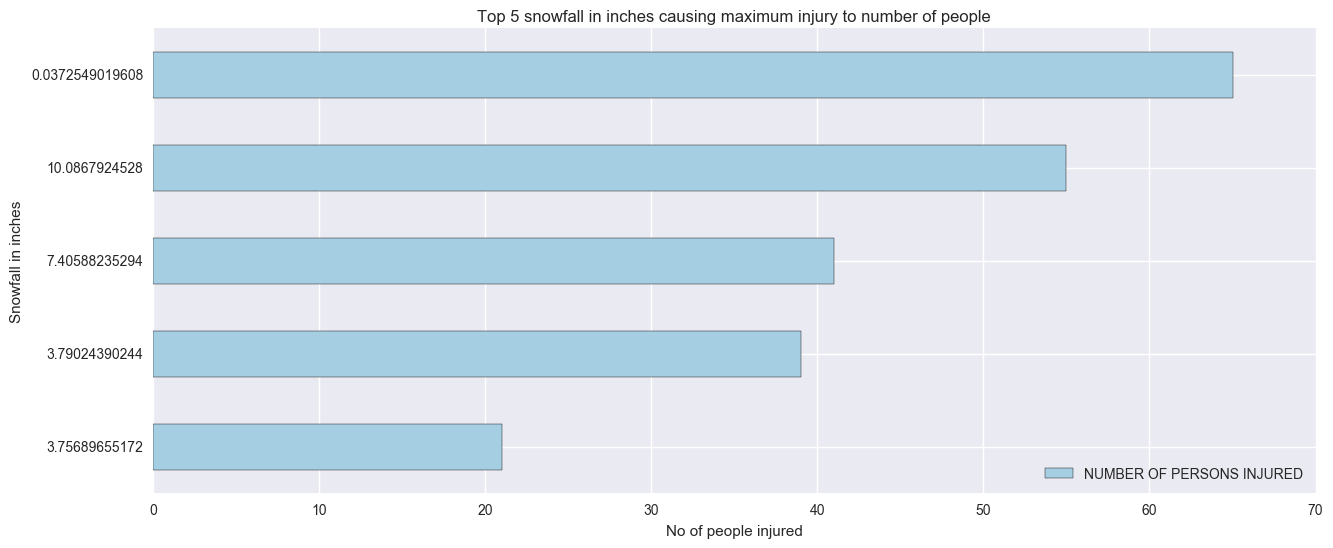

In [33]:
%matplotlib inline
a = snowframetop.plot(kind='barh',colormap='Paired')
fig = a.get_figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Top 5 snowfall in inches causing maximum injury to number of people')
ax1.set_ylabel('Snowfall in inches') 
ax1.set_xlabel('No of people injured') 
fig.set_size_inches(15, 6)
fig.savefig("snowinjury.png")

### Grouping by the rainfall to find the total number of people that were injured

In [111]:
weatherrain = weather.groupby(['PRCP']).agg({'NUMBER OF PERSONS INJURED':sum,'NUMBER OF PEDESTRIANS INJURED':sum,'NUMBER OF PEDESTRIANS INJURED':sum,'NUMBER OF CYCLIST INJURED':sum,'NUMBER OF MOTORIST INJURED':sum})
# grouping by the snow column and calculating the total number of persons that were injured

In [112]:
h = weatherrain['NUMBER OF PERSONS INJURED'].groupby(level=0, group_keys=False)

In [113]:
rain = h.apply(lambda x: x.sort_values(ascending=False)) #arranging the total injuries in the descending order

In [114]:
rainframe = DataFrame(rain)

In [116]:
rainframe = rainframe.drop(rainframe.index[0])

In [117]:
rainframe = rainframe.sort_values(by='NUMBER OF PERSONS INJURED', ascending=True)

In [123]:
rainframetop = rainframe.head(5).to_csv('raininjury.csv') #selecting the top 5 values and printing it in CSV file

### Plotting the graph for rainfall and the no. of injuries

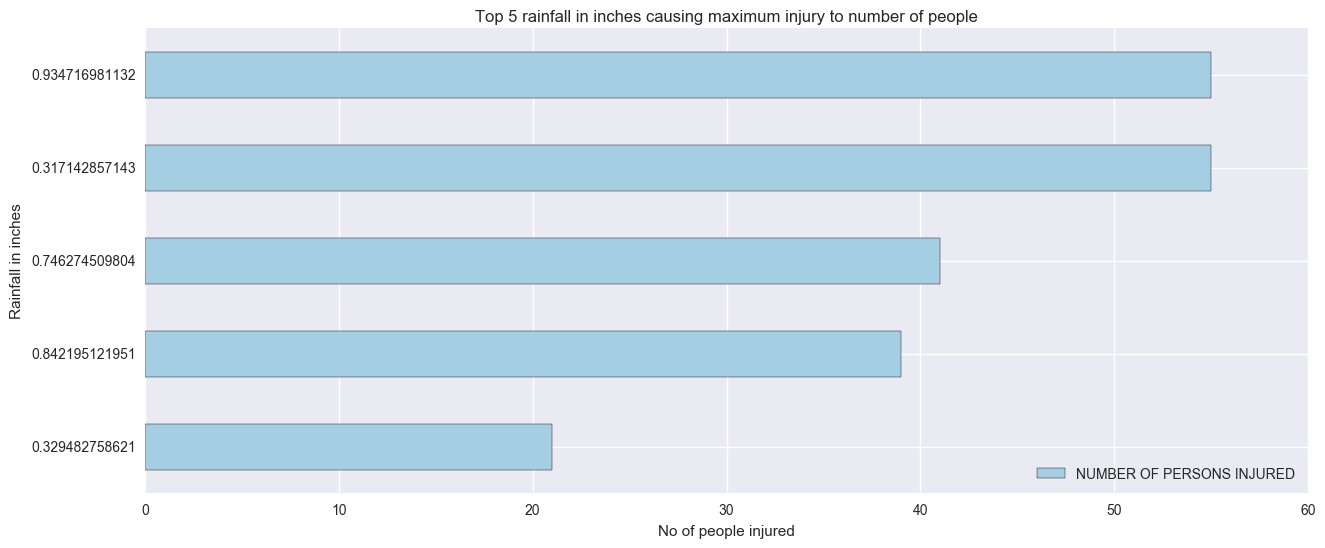

In [121]:
%matplotlib inline
b = rainframetop.plot(kind='barh',colormap='Paired')
fig = b.get_figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Top 5 rainfall in inches causing maximum injury to number of people')
ax1.set_ylabel('Rainfall in inches') 
ax1.set_xlabel('No of people injured') 
fig.set_size_inches(15, 6)
fig.savefig("raininjury.png")